# $\color{Aqua}{\textit{Session 1.3- Statistical Thinking}}$

In [1]:
# import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
plt.style.use("ggplot")
import seaborn as sns
# Random Numbers Generators
gen = np.random.RandomState(seed=1)

In [2]:
# Create synthetic data
data = pd.DataFrame({"Malignant": gen.rand(100),
                     "Benign": gen.rand(100)*8 + 2})

df = pd.DataFrame({"Radius":list(data.Malignant)+list(data.Benign),
                   "Compactness":gen.randn(200)*3 + 2,
                  "Diagnosis":["Malignant"]*100+["Benign"]*100})

# Shuffle the Data Set
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,Radius,Compactness,Diagnosis
0,0.237027,1.067045,Malignant
1,0.670468,-0.991080,Malignant
2,0.098347,5.994371,Malignant
3,9.760160,1.162707,Benign
4,2.993387,-0.631845,Benign
...,...,...,...
195,2.126570,-6.379255,Benign
196,0.027388,0.448717,Malignant
197,0.449912,-3.022587,Malignant
198,4.960674,4.868365,Benign


## Statistical Summary 

In [3]:
# Summary of the Data Set
df.describe(include="all")

,Radius,Compactness,Diagnosis
count,200.000000,200.000000,200
unique,NaN,NaN,2
top,NaN,NaN,Malignant
freq,NaN,NaN,100
mean,3.182295,2.196065,NaN
std,3.250691,3.087732,NaN
min,0.000114,-6.379255,NaN
25%,0.481158,0.147408,NaN
50%,1.544654,2.091618,NaN
75%,6.411333,4.042071,NaN


## Visualization of Data

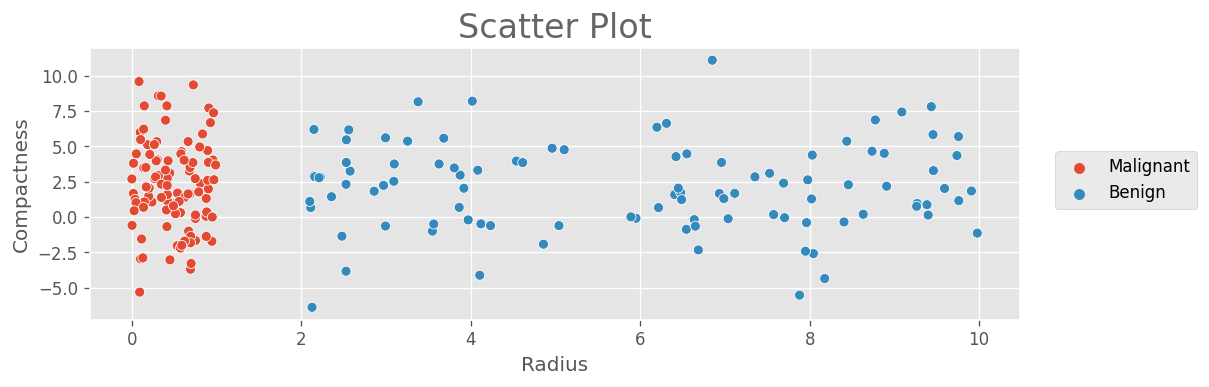

In [38]:
plt.figure(figsize=(10,3),dpi=120)
sns.scatterplot(x="Radius", y="Compactness", data=df, hue="Diagnosis")
plt.title("Scatter Plot", alpha=0.6, size=20)
plt.legend(bbox_to_anchor=(1.2, 0.65))
plt.show()

## Box Plot

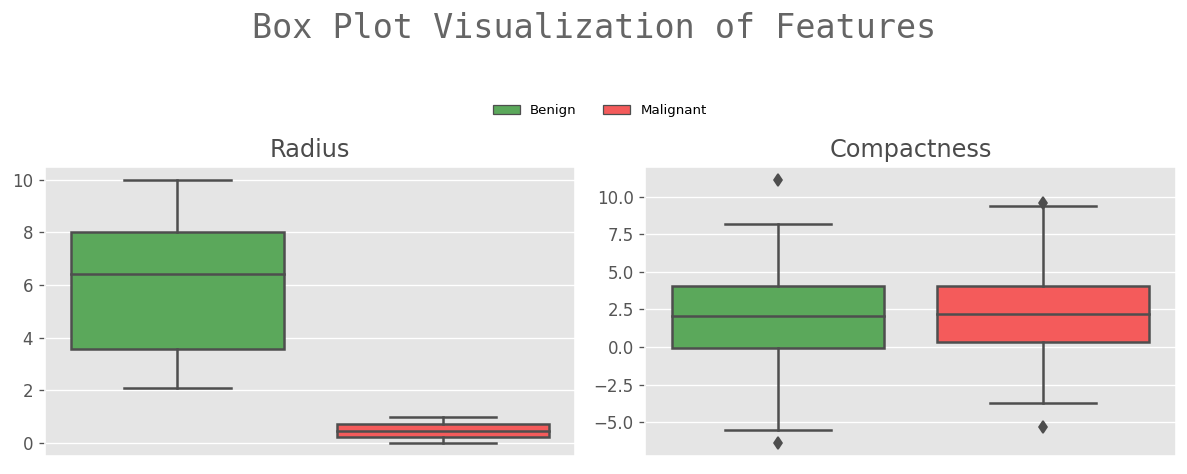

In [39]:
# figure and axes objets
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 3), dpi = 120)
axes = axes.flatten()
# loop for creating box plot for each feature
for i, column in enumerate(list(df.columns)[:2]):

    # box plot
    sns.boxplot(ax = axes[i],                            # axes for drawing the graph
                x = "Diagnosis",                         # Respond Variable on x-axis
                y = column,                              # Feature on y-axis 
                data = df,                               # dataframe
                orient = "v",                            # orientation of box plot
                hue = "Diagnosis",                       # categorical variable
                dodge = False,                           # alignment of box plot with categorical axis, here x-axis
                hue_order = ["Benign", "Malignant"],     # order for names of categories in legend box
                order = ["Benign", "Malignant"],         # order of plotting categories
                palette=['#5ba85b', '#f45b5b'],          # earlier used color hex vlaues for "green" and "red" in Distribution of Tumor's Patient
                saturation = 1.5,                        # color brightness adjustment
                )
    
    axes[i].get_xaxis().set_visible(False)               # x-axiss set to invisible mode
    axes[i].set_ylabel("")                               # y axis label empty
    axes[i].set_title(column.capitalize(), alpha = 0.7)  # title for present box plot  
    axes[i].legend("", frameon = False)                  # set empty legend for present subplot

# single legend for all boxplots i.e, subplots
handles, labels = plt.gca().get_legend_handles_labels()  # returns a list of Artists and labels(i.e. strings) 
fig.legend(handles = handles,                            # artist list
        labels = labels,                                 # labels(i.e. list of string )
        loc ='center',                                   # positon of legend 
        fontsize = 8 ,                                  # labels font size 
        bbox_to_anchor=(0.5, 1.01),                       # coordintes of boundind box point wrt loc parameter 
        ncol = 2,                                        # to put labels in column vector,
        frameon = False                                  # bounding box frame on/off 
        )

# Single title for all boxplots or subplots
plt.suptitle(t = r"Box Plot Visualization of Features",  # title 
            x = 0.5, y = 1.3,                           # coordinates for title 
            fontsize = 20,                              # fontsize
            alpha = .6,                                 # opacity of title font color
            fontname = "Monospace",                     # font style
            color = "black"                             # font color
            )               

plt.tight_layout(rect=[0, 0, 1, 1])
# plt.savefig("2_EDA_1_Box_Plot_Tumor_Viz.png", bbox_inches='tight', dpi = 150)
plt.show()

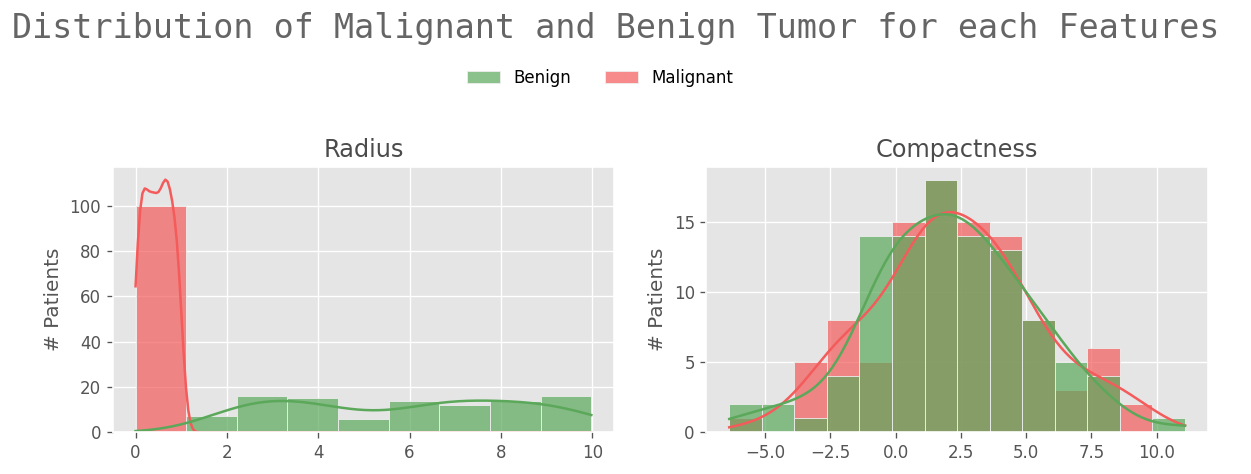

In [43]:
# Histogram : Distributions of Malignant and Benign Tumour for each features. 

fig, axes = plt.subplots( nrows = 1, ncols = 2, figsize = (10, 3), dpi = 120)
axes = axes.flatten()

# loop for creating histogram of each feature

for i, column in enumerate(list(df.columns)[:2]):

    # histogram
    sns.histplot( data = df,                                  # data
                x = column,                                   # x axis 
                hue = "Diagnosis",                               # categorical variable
                kde = True,                                   # density plot
                ax = axes[i],                                 # axes object
                hue_order = ["Benign", "Malignant"],          # order of names in Legend box
                palette=['#5ba85b', '#f45b5b'],               # color of histograms
                alpha = 0.7                                   # color opacity             
                )
    
    axes[i].set_ylabel("# Patients")                          # y-axis label
    axes[i].set_title(column.capitalize(), alpha = 0.7)       # set title for each histogram
    axes[i].set_xlabel("")                                    # x axis label
    axes[i].get_legend().set_visible(False)                   # hide legend visibility in individual plot

# single legend for all histograms i.e, subplots
handles = axes[-1].legend_.get_patches()                      # plt.gca().get_legend_handles_labels returns empty list for sns.histplot, so extract from the handles and labels from ground
labels = plt.gca().legend_.get_texts()                        # labels values
fig.legend(handles = handles,
        labels = [category.get_text() for category in labels ],
        loc ='center',                                        # positon of legend 
        fontsize = 10 ,                                       # labels font size 
        bbox_to_anchor=(0.5, 1.1),                            # coordintes of boundind box point wrt loc parameter 
        ncol = 2,                                             # to put labels in column vector,
        frameon = False                                       # bounding box frame on/off 
        )

# Single title for all subplots
plt.suptitle(t = r"Distribution of Malignant and Benign Tumor for each Features ",      # title 
            x = 0.5, y = 1.3,                                 # coordinates for title 
            fontsize = 20,                                    # fontsize
            alpha = .6,                                       # opacity of title font color
            fontname = "Monospace",                           # font style
            color = "black"                                   # font color
            )               

plt.tight_layout(rect=[0, 0, 1, 1])
# plt.savefig("4_EDA_Distn_of_Malignant_and_Benign_Tumors_for_each_Features.png", bbox_inches = 'tight')
plt.show()